<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S10_C4_NLP_BasicStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargar el texto

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('book')
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
# Selecionar un libro
text1

<Text: Moby Dick by Herman Melville 1851>

In [13]:
book = text1

In [28]:
book.tokens[1000:1010]

['said', 'that', 'he', 'was', 'one', 'of', 'six', 'who', 'had', 'killed']

# 1. Basic statistics
* Count
* Medida de riqueza léxica


In [15]:
# ¿Cuántos tokens tiene el libro?
len(book)

260819

In [16]:
# ¿Cuántas palabras únicas hay en el libro?
len(set(book))

19317

In [24]:
vocabulary = sorted(set(book))

In [32]:
vocabulary[2000:2010]

['LEG',
 'LENGTHWISE',
 'LETTER',
 'LETTERS',
 'LEVIATHAN',
 'LIE',
 'LIFE',
 'LIGHT',
 'LIGHTNING',
 'LINE']

In [29]:
# crear función para calcular ríqueza léxica

def riqueza_lexica(texto):
  return len(set(texto))/len(texto)

In [30]:
riqueza_lexica(book)

0.07406285585022564

In [33]:
book.count('Dick')

84

In [40]:
# crear función de porcentaje de palabra

def token_percent(palabra, texto):
  token_count = texto.count(palabra)
  token_percent = 100 * texto.count(palabra) / len(texto)
  return token_count,  token_percent

In [45]:
token_percent('the', book)

(13721, 5.260736372733581)

# 2. FreqDist

In [42]:
fdist = FreqDist(book)

In [43]:
# ¿Cuántas veces aparecen los tekens en el texto?
# Opción 1
fdist.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

<Axes: xlabel='Samples', ylabel='Counts'>

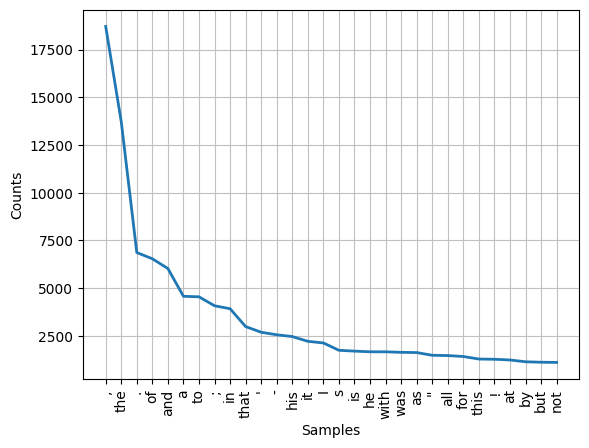

In [49]:
fdist.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

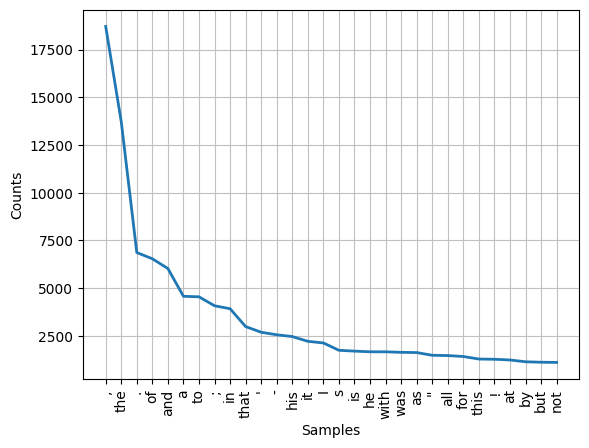

In [50]:
# ¿Cuántas veces aparecen los tekens en el texto?
# Opción 2
book.vocab().most_common(30)
book.vocab().plot(30)

# Ley de Zipf

Describe la relación entra la frecuencia de la palabra y su posición en una lista ordenada por frecuencia.

Text(0.5, 1.0, 'Ley de Zipf')

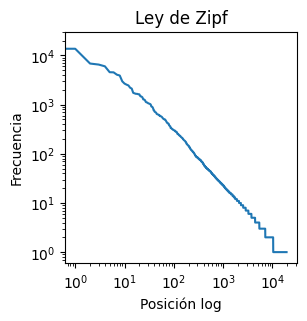

In [53]:
a = list(fdist.values())
a = np.array(a)
a = np.sort(a)
a = a[::-1]
plt.figure(figsize=(3,3))
plt.yscale('log')
plt.xscale('log')
plt.plot(a)
plt.xlabel('Posición log')
plt.ylabel('Frecuencia')
plt.title('Ley de Zipf')


## 2.2. Filtros

In [54]:
# filtrar las distribucion
# len(word)>5 porque la mayoría de los conetorese en inglés tiene hasta 4 caracteres: his, that, this, not.....
long_words = [ word for word in book if len(word)>5 ]


<Axes: xlabel='Samples', ylabel='Counts'>

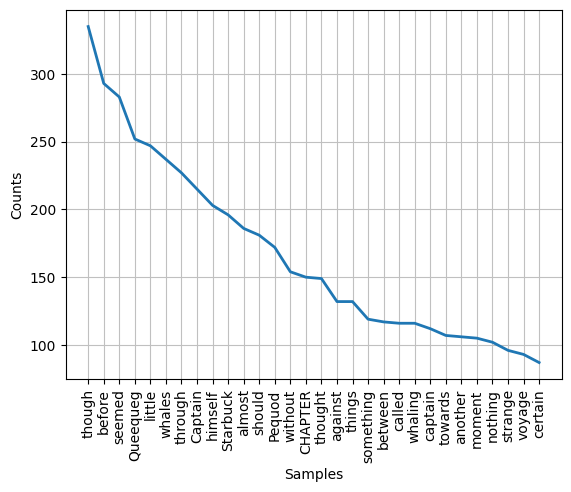

In [57]:
fdist = FreqDist(long_words)
fdist.most_common(10)
fdist.plot(30, cumulative=False)

Pistas parte 1.
* Queenqueg, Starbuck, Pequod: 3 personas
* whales:  ballenas
* voyage: viaje


In [64]:
mayus_book = set([mayus for mayus in long_words if mayus.istitle()])
mayus_book

{'Sounding',
 'Actium',
 'Harris',
 'Meddling',
 'Missouri',
 'Mysteriously',
 'Kraken',
 'Grounds',
 'Forthwith',
 'Whitehall',
 'Quakeress',
 'Dutchman',
 'Header',
 'Deuteronomy',
 'Ophites',
 'Softly',
 'Peterson',
 'Ottoman',
 'Because',
 'Thorkill',
 'Physeter',
 'Colonies',
 'Immortal',
 'Electors',
 'Hearkening',
 'Literally',
 'Exception',
 'Reference',
 'Should',
 'Callao',
 'Stripped',
 'Making',
 'Leaning',
 'Mackinaw',
 'Tumbled',
 'Symphony',
 'Before',
 'Savage',
 'Lothario',
 'Hoveringly',
 'Cruppered',
 'Created',
 'Funeral',
 'Plains',
 'Better',
 'Justice',
 'Shipped',
 'Cathedral',
 'Americas',
 'Nightgown',
 'Judith',
 'Cussed',
 'Leviathans',
 'Pampas',
 'Rensselaers',
 'Season',
 'Westers',
 'Thanks',
 'Trades',
 'According',
 'Around',
 'Maccabees',
 'Lookee',
 'Babylon',
 'Rattle',
 'Tartarean',
 'Dugongs',
 'Christmas',
 'Starting',
 'Passed',
 'Doubts',
 'Pitferren',
 'Quakerish',
 'Dragged',
 'Harbor',
 'Squall',
 'Ashore',
 'Vancouver',
 'Cancer',
 'Lightni

Minireto: listar todos los nombres propios que aparecen een l libro (Los que inician con mayúsclas)

# 3. N- Gram


In [73]:
# Palabras que ocurren de manera consecutiva
book_bigrams = list(nltk.bigrams(book))
book_bigrams[0:10]

[('[', 'Moby'),
 ('Moby', 'Dick'),
 ('Dick', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Melville', '1851'),
 ('1851', ']'),
 (']', 'ETYMOLOGY'),
 ('ETYMOLOGY', '.'),
 ('.', '(')]

In [71]:
fdist = FreqDist(book_bigrams)
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

<Axes: xlabel='Samples', ylabel='Counts'>

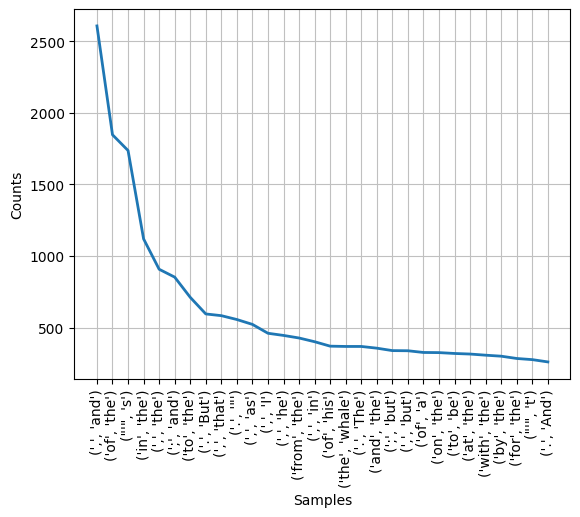

In [74]:
fdist.plot(30, cumulative=False)

In [76]:
th = 4
bigram_words = [ bigram for bigram in book_bigrams if len(bigram[0])>th and len(bigram[1])>th]
fdist = FreqDist(bigram_words)
fdist.most_common(10)

[(('Sperm', 'Whale'), 118),
 (('White', 'Whale'), 74),
 (('sperm', 'whale'), 55),
 (('Right', 'Whale'), 38),
 (('Captain', 'Peleg'), 32),
 (('white', 'whale'), 31),
 (('cried', 'Stubb'), 23),
 (('these', 'things'), 22),
 (('cried', 'Starbuck'), 17),
 (('still', 'further'), 16)]

In [86]:
fdist

FreqDist({('Sperm', 'Whale'): 118, ('White', 'Whale'): 74, ('sperm', 'whale'): 55, ('Right', 'Whale'): 38, ('Captain', 'Peleg'): 32, ('white', 'whale'): 31, ('cried', 'Stubb'): 23, ('these', 'things'): 22, ('cried', 'Starbuck'): 17, ('still', 'further'): 16, ...})

In [84]:
def apariciones(fdist):
  fdist.most_common(10)
  plt.figure(figsize=(8,2))
  fdist.plot(30, cumulative=False)
  return plt.show()

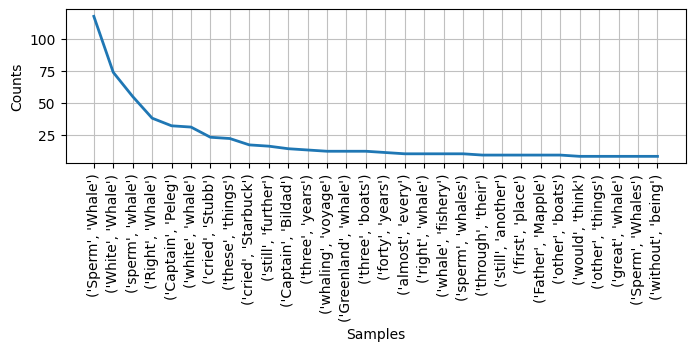

In [85]:
apariciones(fdist)

Pistas parte 1.
* Queenqueg, Starbuck, Pequod: 3 personas
* whales:  ballenas
* voyage: viaje

Pistas parte 2.
* white whales
* Sperm Whale
* hay dos capitanes: Starbuck y Peleg
* whaling voyage
* dos persomnas lloran: Starbuck y Stubb

N-gram

In [87]:
from nltk.util import ngrams

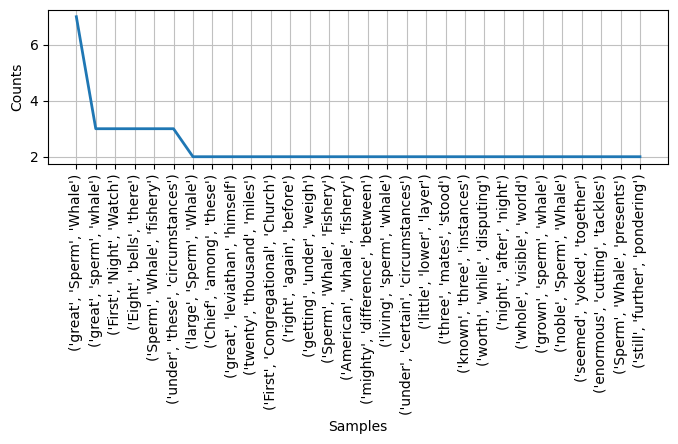

In [95]:
Ngram_book = list(ngrams(book,3))
Ngram_words = [ ngram for ngram in Ngram_book if len(ngram[0])>th and len(ngram[1])>th and len(ngram[2])>th]
fdist = FreqDist(Ngram_words)
apariciones(fdist)

los Ngrams 1 y 2 son colocaciones en el texto de Moby Dyck  'Great Sperm Whale'

Colocación: grupos de palabras que están juntas de manera frecuente

# Colocaciones

In [90]:
from nltk.collocations import *

In [104]:
bigram = nltk.collocations.BigramAssocMeasures()
trigram = nltk.collocations.TrigramAssocMeasures()

In [108]:
from nltk.collocations import *
bigram = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)
finder.apply_freq_filter(25)
finder.nbest(bigram.pmi,100)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other'),
 (',"', 'cried'),
 ('on', 'board'),
 ('at', 'least'),
 ('sperm', 'whale'),
 ('an', 'instant'),
 ('be', 'sure'),
 ('Captain', 'Ahab'),
 ('once', 'more'),
 ('has', 'been'),
 ('cried', 'Ahab'),
 ('I', 'am'),
 ('let', 'me'),
 ('?"', '"'),
 ('have', 'been'),
 ("'", 'll'),
 ("'", 'st'),
 ('don', "'"),
 ('won', "'"),
 ("'", 'em'),
 ("'", 've'),
 ("'", 's'),
 ('at', 'last'),
 ('-', 'Fish'),
 ("'", 't'),
 ('had', 'been'),
 ('old', 'man'),
 ("'", 'm'),
 ('more', 'than'),
 ("'", 'S'),
 ('."', '"'),
 ('"', 'Aye'),
 ('?', 'What'),
 ('ye', 'see'),
 ('at', 'times'),
 ('so', 'much'),
 ('main', '-'),
 ('must', 'have'),
 ('might', 'have'),
 ('may', 'be'),
 ('quarter', '-'),
 ('any', 'other'),
 ('Oh', '!'),
 ('mast', '-'),
 ('my', 'own'),
 ('might', 'be'),
 ('should', 'be'),
 ('could', 'not'),
 ('did', 'not'),
 ('must', 'be'),
 (

In [ ]:


th = 4
bigram_words = [ bigram for bigram in book_bigrams if len(bigram[0])>th and len(bigram[1])>th]
fdist = FreqDist(bigram_words)
fdist.most_common(10)
apariciones(fdist)